In [1]:
# required pacakges to be imported
import pandas as pd
import matplotlib as plt
import numpy as np
from pandas import DataFrame
from datetime import date
from matplotlib import style
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6
import math
# importing the dataset from local storage
#data = pd.read_csv("C:\\Users\\KANDIRAJU\\Downloads\\time-series-datasets\\Electric_Production.csv")
#data.head()
data = pd.read_csv("../input/Electric_Production.csv")
data.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [2]:
# renaming the column names as per my convenience
data.rename(columns = {'DATE' : 'date', 'Value' : 'value'}, inplace=True)
data.head()

,date,value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


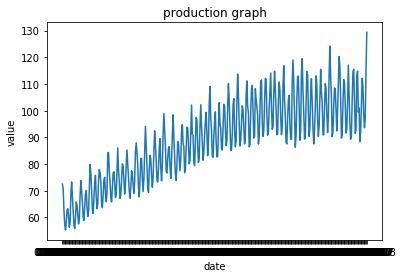

In [3]:
# to plot a graph, index has to be set. it is not possible to plot the graph without index.
data.set_index('date', inplace=True)
data.head()
plt.xlabel("date")
plt.ylabel("value")
plt.title("production graph")
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
plt.plot(data)
# we will notice that the x axis is messed up, this is because, it plotted all the date points and it got overlapped.

In [4]:
#determining the rolling mean
# the reason why the window is considered as 12 beacuse, we have to calculate the mean for every one year which is for 12 months
# from this data we see that we have only the first month data of every year
# to make it as an year, we consider all the 1st month of every year and count them to 12 months which makes one year
rolmean = data.rolling(window=12).mean()
print(rolmean)


                 value
date                  
01-01-1985         NaN
02-01-1985         NaN
03-01-1985         NaN
04-01-1985         NaN
05-01-1985         NaN
06-01-1985         NaN
07-01-1985         NaN
08-01-1985         NaN
09-01-1985         NaN
10-01-1985         NaN
11-01-1985         NaN
12-01-1985   62.165667
01-01-1986   62.232375
02-01-1986   62.008617
03-01-1986   61.989608
04-01-1986   61.953067
05-01-1986   61.994617
06-01-1986   62.145458
07-01-1986   62.407567
08-01-1986   62.510325
09-01-1986   62.544983
10-01-1986   62.646383
11-01-1986   62.758150
12-01-1986   62.709892
01-01-1987   62.752350
02-01-1987   62.925275
03-01-1987   63.207600
04-01-1987   63.468075
05-01-1987   63.723050
06-01-1987   64.055658
...                ...
08-01-2015  104.057283
09-01-2015  104.182550
10-01-2015  104.116900
11-01-2015  103.563525
12-01-2015  103.052908
01-01-2016  102.787417
02-01-2016  101.978250
03-01-2016  101.218600
04-01-2016  101.183542
05-01-2016  101.153867
06-01-2016 

In [5]:
# we got some NaN values, this is because, as we are claculating the mean for every 12 months
# Hence it takes the values of first 12 months and that is the reason why the first 11 months are NaN

In [6]:
#determining the standard deviation
std = data.rolling(window=12).std()
print(std)

                value
date                 
01-01-1985        NaN
02-01-1985        NaN
03-01-1985        NaN
04-01-1985        NaN
05-01-1985        NaN
06-01-1985        NaN
07-01-1985        NaN
08-01-1985        NaN
09-01-1985        NaN
10-01-1985        NaN
11-01-1985        NaN
12-01-1985   5.746613
01-01-1986   5.880632
02-01-1986   5.573367
03-01-1986   5.572113
04-01-1986   5.605773
05-01-1986   5.553706
06-01-1986   5.461847
07-01-1986   5.561265
08-01-1986   5.589537
09-01-1986   5.577788
10-01-1986   5.464146
11-01-1986   5.373441
12-01-1986   5.317393
01-01-1987   5.410902
02-01-1987   5.622423
03-01-1987   5.668773
04-01-1987   5.425866
05-01-1987   5.095289
06-01-1987   4.951314
...               ...
08-01-2015   9.937530
09-01-2015   9.896865
10-01-2015   9.984472
11-01-2015  10.425603
12-01-2015  10.265377
01-01-2016   9.810756
02-01-2016   8.950585
03-01-2016   9.105324
04-01-2016   9.154191
05-01-2016   9.190381
06-01-2016   9.219604
07-01-2016   9.548704
08-01-2016

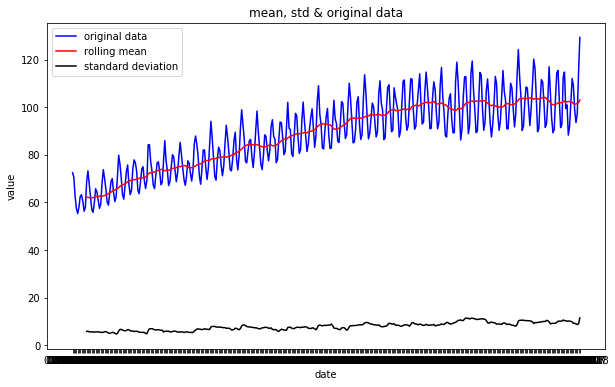

In [7]:
# plot rolling statistics
original_data = plt.plot(data, color='blue',label='original data')
mean = plt.plot(rolmean,color ='red',label='rolling mean')
std = plt.plot(std,color ='black',label='standard deviation')
plt.title("mean, std & original data")
plt.xlabel("date")
plt.ylabel("value")
plt.legend()
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
plt.show(block =False)

In [8]:
# we see that the data is not stationary, in order to check the stationarity, perform dickey fuller test

In [9]:
# perform dickey fuller test (ADFT)
from statsmodels.tsa.stattools import adfuller 

print("results")
adft = adfuller(data['value'],autolag='AIC')
# output for dft will give us without defining what the values are.
#hence we manually write what values does it explains using a for loop
output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
for key,values in adft[4].items():
    output['critical value (%s)'%key] =  values
print(output)

results
Test Statistics                 -2.256990
p-value                          0.186215
No. of lags used                15.000000
Number of observations used    381.000000
critical value (1%)             -3.447631
critical value (5%)             -2.869156
critical value (10%)            -2.570827
dtype: float64


In [10]:
# we see that the p value is greater than 0.5 so we cannot reject the null hypothesis.
# Also the test statistics is greater  than the critical values. so the data is non stationary

In [11]:
# 1. estimate the first module which is " trend"

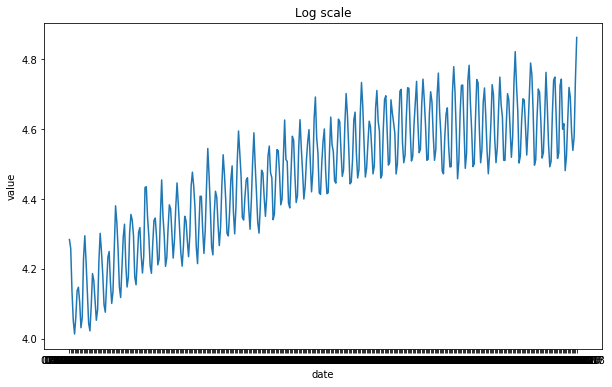

In [12]:
data_logscale = np.log(data)
plt.plot(data_logscale)
plt.title("Log scale")
plt.xlabel("date")
plt.ylabel("value")
#plt.legend()
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
plt.show(block =False)

In [13]:
# we see the spread of the data evenly compaered to the mean of the data. 
# the scale on the y axis changed as we have taken the log of it. But still data is not stationary

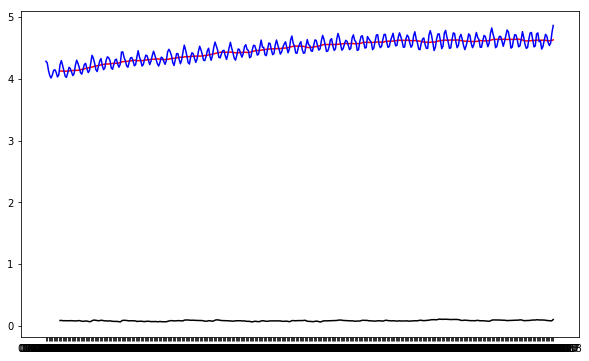

In [14]:
#determining the rolling mean(average)
moving_average = data_logscale.rolling(window=12).mean()
#print(rolmean_log)
#determining the standard deviation
std_dev = data_logscale.rolling(window=12).std()
#print(std_log)
plt.plot(moving_average, color='red')
plt.plot(data_logscale, color='blue')
plt.plot(std_dev, color='black')

In [15]:
# now substrcting the log scale with the moving average
# there is nothing specific to perform this subtraction. You can even try by changing the logarithmic function.
#As the data is not stationary, this is one of the steps to perform the test to ensure that the data is stationary
movingavg_logscale = data_logscale - moving_average



In [16]:
# we get so many NaN values once we perform this operation, hence those vales are to be removed and clean the noise data
movingavg_logscale.dropna(inplace=True)
movingavg_logscale.head(10)

,value
date,
12-01-1985,0.103961
01-01-1986,0.167724
02-01-1986,0.095629
03-01-1986,0.007329
04-01-1986,-0.079115
05-01-1986,-0.101472
06-01-1986,-0.033363
07-01-1986,0.055963
08-01-1986,0.034639


In [17]:
# perform dickey fuller test (ADFT) once again
# An actual code of dickey fuller test
# we have to perform this function everytime to check whether the data is stationary or not.
from statsmodels.tsa.stattools import adfuller 
# we define a function to test the stationarity with respect to time, hence we take timeseries
#the reason to define it in the for of a function is because, this function can be used in the coming tests as well.
# it becomes easy to use the same function and check the stationarity
def test_stationarity(timeseries):
    
    #determining the rolling statistics for timeseries
    
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #plotting the rolling statistics for timeseries
    
    timeseries_original =plt.plot(timeseries, color='blue',label = 'original graph')
    timeseries_mean =plt.plot(movingAverage, color='red',label = 'movingAverage')
    timeseries_std =plt.plot(movingSTD, color='black',label = 'movingSTD')
    plt.legend(loc='best')
    plt.title("rolling mean standard deviation of timeseries")
    plt.show(block=False)
    
    #perform dickey fuller test
    
    print("results of dickey fuller test")
    adft = adfuller(data['value'],autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    

In [18]:
# after defining the function, use the movingavg_logscale which is subtracted from 2 values in the above cell
# you can use any function call by taking the difference or the using different log to remove the stationarity

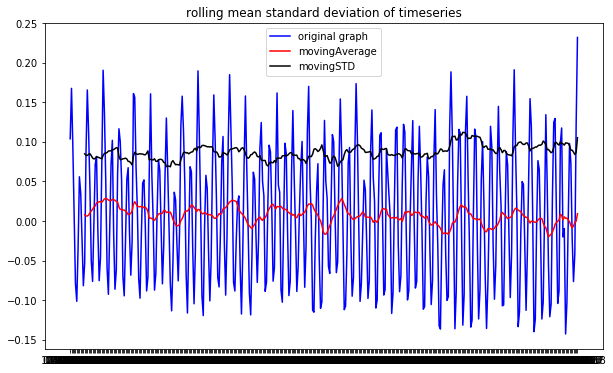

results of dickey fuller test
Test Statistics                 -2.256990
p-value                          0.186215
No. of lags used                15.000000
Number of observations used    381.000000
critical value (1%)             -3.447631
critical value (5%)             -2.869156
critical value (10%)            -2.570827
dtype: float64


In [19]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
test_stationarity(movingavg_logscale)

In [20]:
# from the above graph we observed that the data attained stationartiy
# we also see that the p-value is less, so we can reject the null hypothesis as it attained null hypothesis.
# we also see that the test statistics and critial value is relatively equal

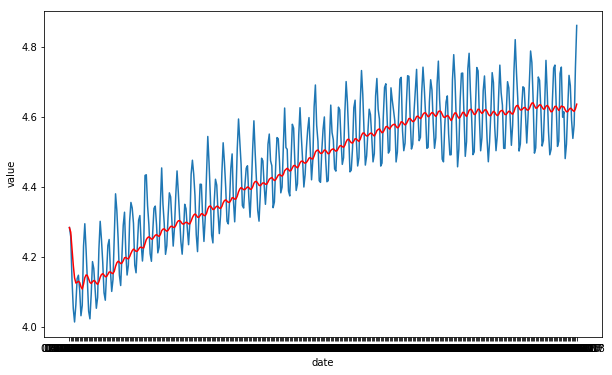

In [21]:
# one of the module is completed as we came to a conclusion
# we need to check the weighted average, to understand the trend of the data in timeseries
# take the previous log data 
weighted_average = data_logscale.ewm(halflife=12, min_periods=0,adjust=True).mean()
# evm stands for exponential weighted mean
plt.plot(data_logscale)
plt.plot(weighted_average, color='red')
plt.xlabel("date")
plt.ylabel("value")
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
#plt.legend()
plt.show(block =False)

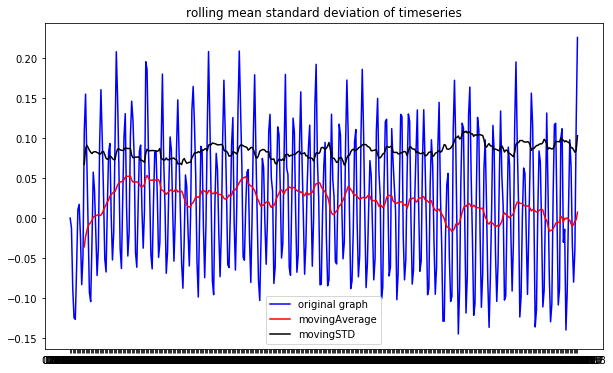

results of dickey fuller test
Test Statistics                 -2.256990
p-value                          0.186215
No. of lags used                15.000000
Number of observations used    381.000000
critical value (1%)             -3.447631
critical value (5%)             -2.869156
critical value (10%)            -2.570827
dtype: float64


In [22]:
# previously we subtracted data_logscale with moving average, now take the same log_scale and subtract with weighted_average
logScale_weightedMean = data_logscale-weighted_average
# use the same function defined above and pass the object into it.
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
test_stationarity(logScale_weightedMean)

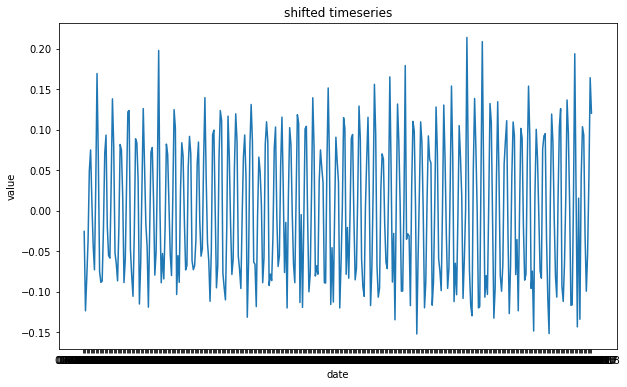

In [23]:
# here we perform the shifting method as we have subtracted mean from the original values
data_log_shift = data_logscale - data_logscale.shift()
plt.xlabel("date")
plt.ylabel("value")
plt.title("shifted timeseries")
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
plt.plot(data_log_shift)

In [24]:
# here, the time series is shifted by 1, which means, the time is differentiated by 1 ( finding the 'd' value)
# in ARIMA model, I stands for integration and that's what we calculated here.

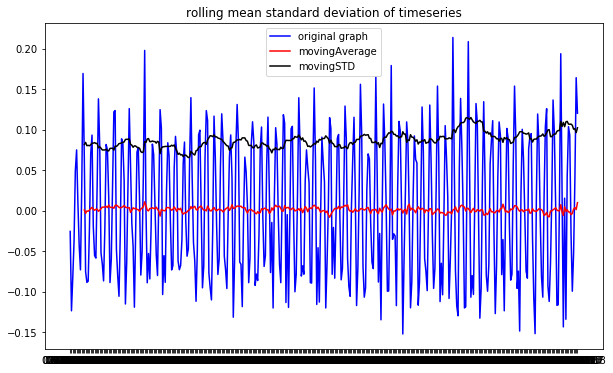

results of dickey fuller test
Test Statistics                 -2.256990
p-value                          0.186215
No. of lags used                15.000000
Number of observations used    381.000000
critical value (1%)             -3.447631
critical value (5%)             -2.869156
critical value (10%)            -2.570827
dtype: float64


In [25]:
# here we are dropping the NaN values, and the data_log_shift value here is 'd'
data_log_shift.dropna(inplace=True)
# using the same fuction call and plotting the graph.
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
test_stationarity(data_log_shift)

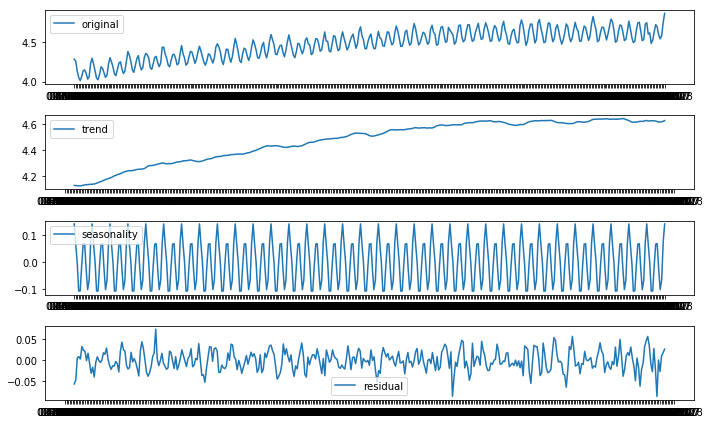

In [26]:
# next is to segregate the differentiated values to decompose, we use seasonal decompose method from stats model.
# !pip install statsmodels
# !pip install --upgrade patsy
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
# to plot all the 4 graphs at once, use the below code

#decomposition = seasonal_decompose(data_logscale,model='additive', freq=12).plot()

# plotting the graphs induvidually
decomposition = seasonal_decompose(data_logscale,model='additive', freq=12)
trend = decomposition.trend
seasonality =decomposition.seasonal
# ensure that the residual method is just " resid "
# check the values inside the subplots are 411,412,413,414 which mean, there are 4 graphs in total(1st number in the value)
residual =decomposition.resid
plt.subplot(411)
plt.plot(data_logscale,label= 'original')
plt.legend(loc='best')
plt.plot()
plt.subplot(412)
plt.plot(trend,label= 'trend')
plt.legend(loc='best')
plt.plot()
plt.subplot(413)
plt.plot(seasonality,label= 'seasonality')
plt.legend(loc='best')
plt.plot()
plt.subplot(414)
plt.plot(residual,label= 'residual')
plt.legend(loc='best')
plt.plot()
plt.tight_layout()



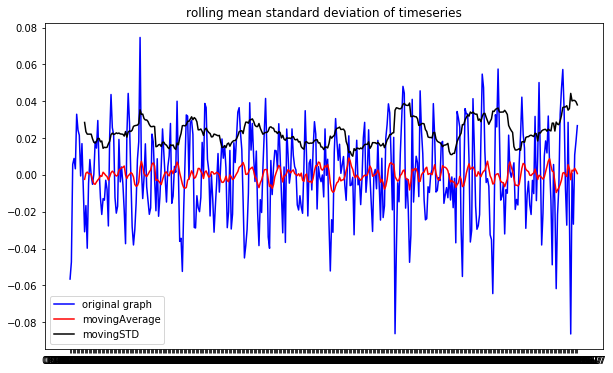

results of dickey fuller test
Test Statistics                 -2.256990
p-value                          0.186215
No. of lags used                15.000000
Number of observations used    381.000000
critical value (1%)             -3.447631
critical value (5%)             -2.869156
critical value (10%)            -2.570827
dtype: float64


In [27]:
decomposed_logdata = residual
decomposed_logdata.dropna(inplace=True)
test_stationarity(decomposed_logdata)


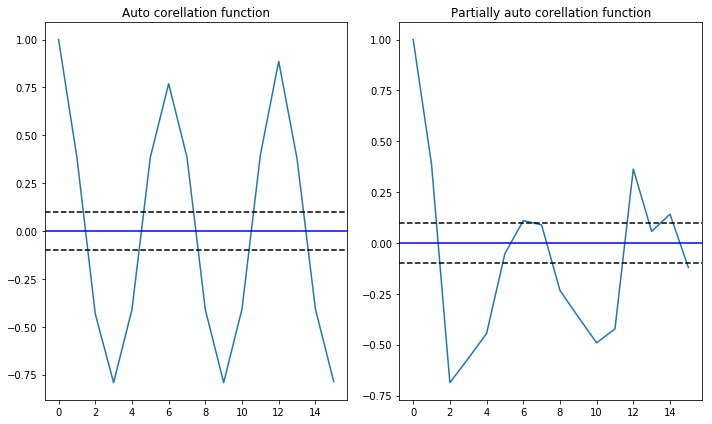

In [28]:
# plot acf  and pacf graphs ( auto corellation function and partially auto corellation function )
# to find 'p' from p,d,q we need to use, PACF graphs and for 'q' use ACF graph
from statsmodels.tsa.stattools import acf,pacf
# we use d value here(data_log_shift)
acf = acf(data_log_shift, nlags=15)
pacf= pacf(data_log_shift, nlags=15,method='ols')

# ols stands for ordinary least squares used to minimise the errors

# 121 and 122 makes the data to look side by size

#plot PACF
plt.subplot(121)
plt.plot(acf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(data_log_shift)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(data_log_shift)),linestyle='--',color='black')
plt.title('Auto corellation function')
plt.tight_layout()


#plot ACF
plt.subplot(122)
plt.plot(pacf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(data_log_shift)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(data_log_shift)),linestyle='--',color='black')
plt.title('Partially auto corellation function')
plt.tight_layout()



In [29]:
# in order to find the p and q values from the above graphs,
#  we need to check,where the graph cuts off the origin or drops to zero for the first time
# from the above graphs the p and q values arw merely close to 2 where the graph cuts off the orgin ( draw the line to x axis)
# now we have p,d,q values. So now we can substitute in the ARIMA model and lets see the output.

/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/opt/conda/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted a

RSS : 1.273784


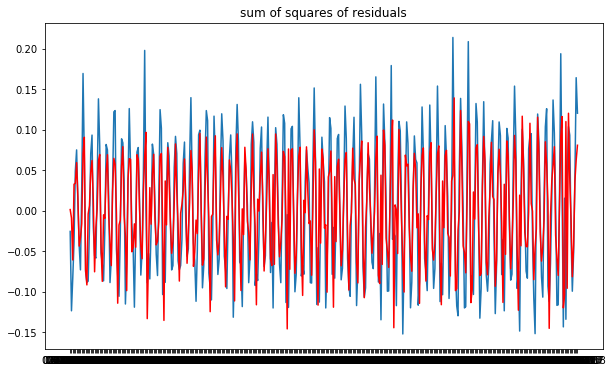

In [30]:
from statsmodels.tsa.arima_model import ARIMA

# calculating the AR model
model = ARIMA(data_logscale, order =(2,1,0))
# consider MA as 0 in MA_model
AR_result = model.fit()
plt.plot(data_log_shift)
plt.plot(AR_result.fittedvalues, color='red')
plt.title("sum of squares of residuals")
print('RSS : %f' %sum((AR_result.fittedvalues-data_log_shift["value"])**2))

In [31]:
# less the RSS more effective the model is

/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/opt/conda/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted a

RSS : 1.273784


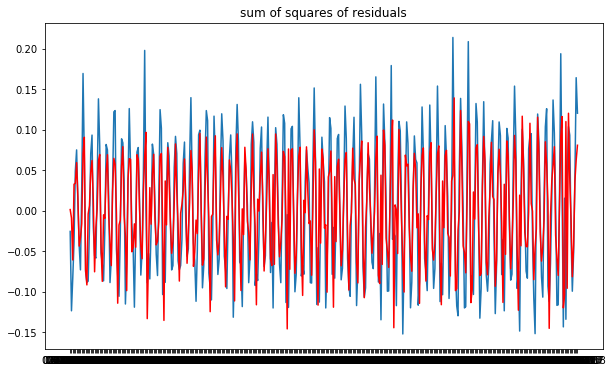

In [32]:
# calculating the MA model
model = ARIMA(data_logscale, order =(2,1,0))
# consider MA as 0 in MA_model
MA_result = model.fit()
plt.plot(data_log_shift)
plt.plot(MA_result.fittedvalues, color='red')
plt.title("sum of squares of residuals")
print('RSS : %f' %sum((MA_result.fittedvalues-data_log_shift["value"])**2))


In [33]:
# There is no need of finding the AR and MA values, this is just for our referrence, we already know the values of p,d,q
# you can simply plot the ARIMA model and check for the results.


/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


RSS : 0.522661


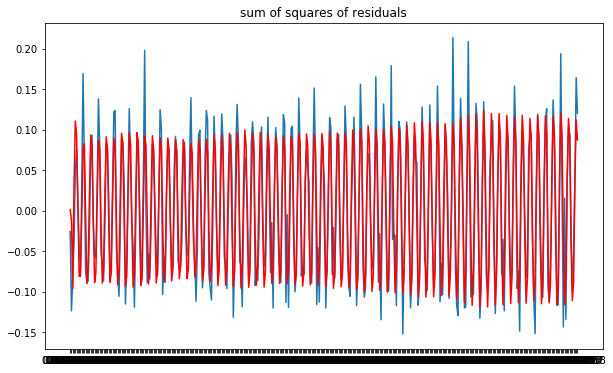

In [34]:
# calculating the ARIMA model
model = ARIMA(data_logscale, order =(3,1,3))
ARIMA_result = model.fit()
plt.plot(data_log_shift)
plt.plot(ARIMA_result.fittedvalues, color='red')
plt.title("sum of squares of residuals")
print('RSS : %f' %sum((ARIMA_result.fittedvalues-data_log_shift["value"])**2))

In [35]:
# we founded the predicted values in the above code and we need to print the values in the form of series
ARIMA_predicts = pd.Series(ARIMA_result.fittedvalues,copy=True)
ARIMA_predicts.head()

date
02-01-1985    0.001381
03-01-1985   -0.012071
04-01-1985   -0.096126
05-01-1985    0.032675
06-01-1985    0.110766
dtype: float64

In [36]:
# finding the cummulative sum
ARIMA_predicts_cumsum = ARIMA_predicts.cumsum()
print(ARIMA_predicts_cumsum.head())

date
02-01-1985    0.001381
03-01-1985   -0.010691
04-01-1985   -0.106817
05-01-1985   -0.074141
06-01-1985    0.036625
dtype: float64


In [37]:
ARIMA_predicts_log = pd.Series(data_logscale['value'],index =data_logscale.index)
ARIMA_predicts_log = ARIMA_predicts_log.add(ARIMA_predicts_cumsum,fill_value=0)
print(ARIMA_predicts_log.head())

date
01-01-1985    4.283658
01-01-1986    4.418060
01-01-1987    4.448959
01-01-1988    4.543158
01-01-1989    4.538852
dtype: float64


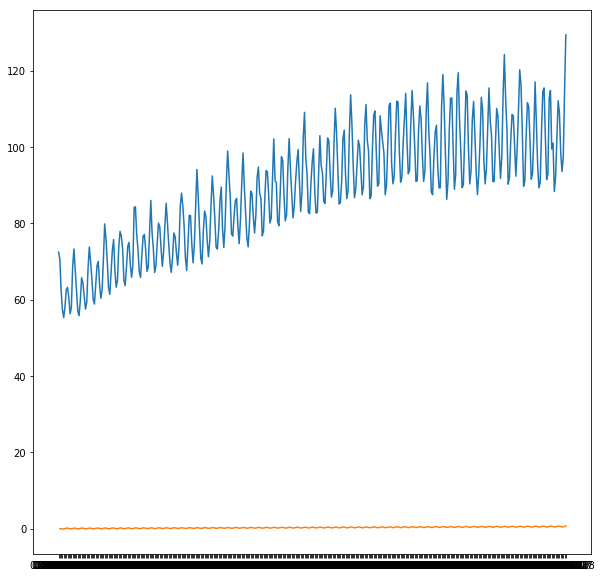

In [38]:
# converting back to the exponential form results in getting back to the original data.
ARIMA_final_preditcs = np.exp(ARIMA_predicts_log)
rcParams['figure.figsize']=10,10
plt.plot(data)
plt.plot(ARIMA_predicts_cumsum)

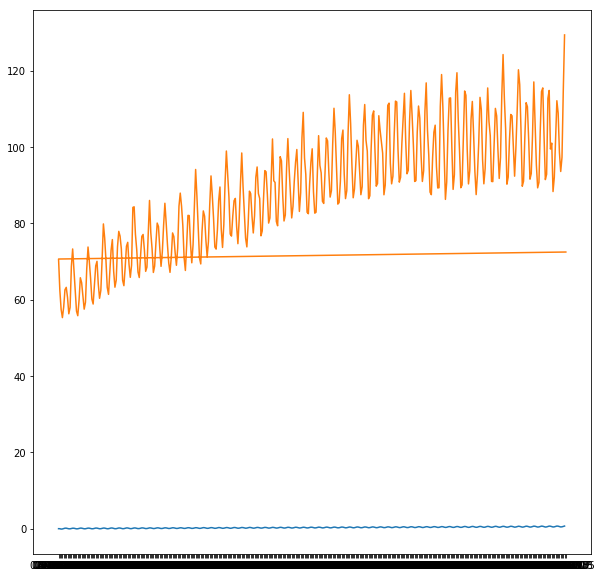

In [39]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,10
plt.plot(ARIMA_predicts_cumsum)
plt.plot(data)


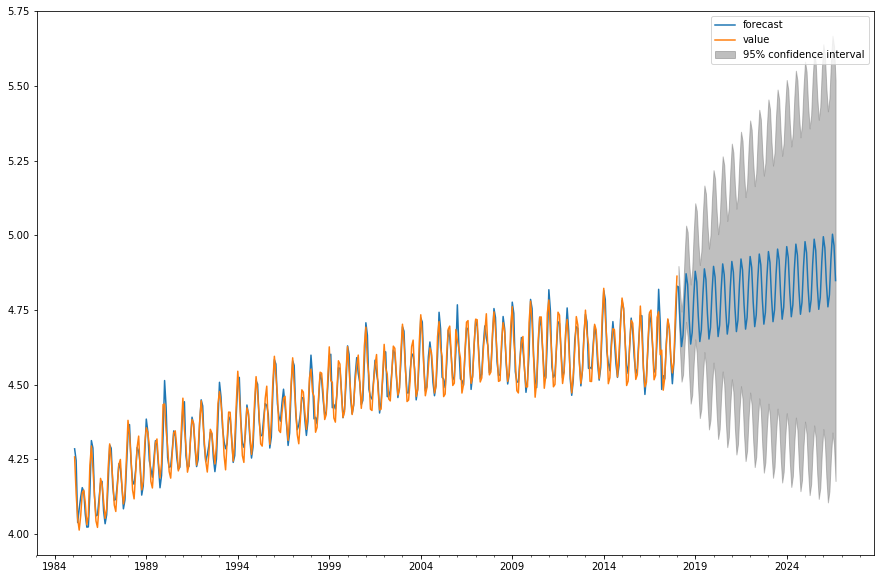

In [40]:
#future prediction
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,10
ARIMA_result.plot_predict(1,500)
x=ARIMA_result.forecast(steps=200)

In [41]:
# from the above graph, we calculated the future predictions till 2024
# the greyed out area is the confidence interval wthe predictions will not cross that area.


In [45]:
# check the predicted values for ARIMA_result.plot_predict(1,500)
ARIMA_result.forecast(steps=200)

(array([4.82703329, 4.71343448, 4.62737965, 4.66601224, 4.78258049,
        4.87112169, 4.83528219, 4.72127692, 4.63576327, 4.67434154,
        4.7912978 , 4.87931539, 4.84351282, 4.72913703, 4.64413037,
        4.68268816, 4.79999836, 4.88752469, 4.85172704, 4.73701302,
        4.65248273, 4.69105035, 4.80868389, 4.89574791, 4.85992649,
        4.74490325, 4.66082195, 4.69942653, 4.81735592, 4.90398354,
        4.86811267, 4.75280626, 4.66914946, 4.70781531, 4.82601583,
        4.91223022, 4.8762869 , 4.76072076, 4.67746655, 4.71621541,
        4.83466486, 4.92048672, 4.88445039, 4.76864557, 4.68577437,
        4.72462571, 4.84330412, 4.92875198, 4.8926042 , 4.77657964,
        4.69407394, 4.7330452 , 4.85193459, 4.937025  , 4.90074929,
        4.78452204, 4.70236619, 4.74147296, 4.86055718, 4.94530492,
        4.90888652, 4.79247192, 4.71065195, 4.74990819, 4.86917266,
        4.95359094, 4.91701666, 4.80042854, 4.71893196, 4.75835016,
        4.87778177, 4.96188238, 4.92514041, 4.80

In [43]:
# Finally we calculated the units(value) of electricity is consumed in the coming future using time series analysis.

In [44]:
# **********                                 THE END                                                        **************** #